# Regression with Multiple Features

## Concept Summary

Multiple feature regression extends linear regression to handle $n$ input features:

$$\hat{y} = \mathbf{w} \cdot \mathbf{x} + b = w_1 x_1 + w_2 x_2 + \cdots + w_n x_n + b$$

Using vectorized notation for $m$ training examples:

$$\hat{\mathbf{y}} = X \mathbf{w} + b$$

where:
- $X$ is the feature matrix, shape $(m, n)$
- $\mathbf{w}$ is the weight vector, shape $(n,)$
- $b$ is the bias (scalar)

### Key Concepts

| Concept | Formula | Purpose |
|---------|---------|--------|
| **Hypothesis** | $f_{\mathbf{w},b}(\mathbf{x}) = \mathbf{w} \cdot \mathbf{x} + b$ | Predict output from multiple features |
| **Cost Function (MSE)** | $J(\mathbf{w},b) = \frac{1}{2m} \sum_{i=1}^{m}(f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2$ | Measure prediction error |
| **Gradient (weights)** | $\frac{\partial J}{\partial w_j} = \frac{1}{m} \sum_{i=1}^{m}(f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) x_j^{(i)}$ | Update direction for each weight |
| **Gradient (bias)** | $\frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^{m}(f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})$ | Update direction for bias |
| **Feature Scaling** | $x_j^{(i)} = \frac{x_j^{(i)} - \mu_j}{\sigma_j}$ | Normalize features for faster convergence |

### What's New vs. Week 1

| Week 1 (Single Feature) | Week 2 (Multiple Features) |
|-------------------------|---------------------------|
| $w$ is a scalar | $\mathbf{w}$ is a vector of length $n$ |
| `w * X` (element-wise) | `X @ w` or `np.dot(X, w)` (matrix multiply) |
| One gradient $\frac{\partial J}{\partial w}$ | $n$ gradients $\frac{\partial J}{\partial w_j}$ (vectorized) |
| No scaling needed | Feature scaling is critical |

### Learning Objectives

- **Level 1**: Implement vectorized multi-feature regression from scratch
- **Level 2**: Use scikit-learn with multiple features and feature scaling

---

# Level 1: Multiple Feature Regression from Scratch

In this section, you will implement:
1. Vectorized cost function for multiple features
2. Vectorized gradient computation
3. Gradient descent with multiple features

Use only **NumPy** — no scikit-learn allowed here!

In [14]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

## 1.1 Generate Multi-Feature Synthetic Data

We create a dataset with 3 features at **different scales** to demonstrate why feature scaling matters.

True relationship: $y = 0.5 x_1 + 2.0 x_2 + 0.1 x_3 + 4 + \text{noise}$

| Feature | Range | Scale |
|---------|-------|-------|
| $x_1$ (e.g., size in sqft) | 500–3500 | Large |
| $x_2$ (e.g., bedrooms) | 1–5 | Small |
| $x_3$ (e.g., age in years) | 0–100 | Medium |

In [15]:
# Generate training data with 3 features at different scales
m = 1000  # number of training examples
n = 3     # number of features

X_train = np.column_stack([
    500 + 3000 * np.random.rand(m),   # x1: size (500–3500 sqft)
    1 + 4 * np.random.rand(m),         # x2: bedrooms (1–5)
    100 * np.random.rand(m),           # x3: age (0–100 years)
])

# True weights and bias
w_true = np.array([0.5, 2.0, 0.1])
b_true = 4.0

y_train = X_train @ w_true + b_true + np.random.randn(m) * 5

print(f"X_train shape: {X_train.shape}  (m={m} samples, n={n} features)")
print(f"y_train shape: {y_train.shape}")
print(f"\nFeature ranges:")
for i, name in enumerate(["Size (sqft)", "Bedrooms", "Age (years)"]):
    print(f"  {name:15s}: min={X_train[:, i].min():.1f}, max={X_train[:, i].max():.1f}")

X_train shape: (1000, 3)  (m=1000 samples, n=3 features)
y_train shape: (1000,)

Feature ranges:
  Size (sqft)    : min=513.9, max=3499.2
  Bedrooms       : min=1.0, max=5.0
  Age (years)    : min=0.0, max=99.8


## 1.2 Implement the Vectorized Cost Function

The cost function is the same as Week 1, but now using matrix operations:

$$J(\mathbf{w}, b) = \frac{1}{2m} \sum_{i=1}^{m} (\mathbf{w} \cdot \mathbf{x}^{(i)} + b - y^{(i)})^2$$

Vectorized: $J = \frac{1}{2m} \| X\mathbf{w} + b - \mathbf{y} \|^2$

**Hint**: Use `X @ w` or `np.dot(X, w)` for the matrix-vector product.

In [16]:
def compute_cost(X, y, w, b):
    """
    Compute the MSE cost for multiple feature linear regression.

    Args:
        X (np.ndarray): Input features, shape (m, n)
        y (np.ndarray): Target values, shape (m,)
        w (np.ndarray): Weight vector, shape (n,)
        b (float): Bias parameter

    Returns:
        float: The MSE cost
    """
    m = X.shape[0]

    
    # Step 1: Compute predictions using matrix multiplication: X @ w + b
    # Step 2: Compute the squared errors
    # Step 3: Return the mean (divided by 2m)

    predictions = np.dot(X, w) + b
    errors = predictions - y
    mean = np.sum(errors ** 2) / (2 * m)
    return mean

In [17]:
# --- Validation: Cost Function ---
# With true weights, cost should be small (just noise)
# With zero weights, cost should be large

cost_good = compute_cost(X_train, y_train, w=w_true, b=b_true)
cost_bad = compute_cost(X_train, y_train, w=np.zeros(n), b=0)

print(f"Cost with true weights (good): {cost_good:.4f}  (expected: ~12, just noise)")
print(f"Cost with zero weights (bad):  {cost_bad:.4f}  (expected: very large)")

Cost with true weights (good): 12.6006  (expected: ~12, just noise)
Cost with zero weights (bad):  596381.8711  (expected: very large)


## 1.3 Implement the Vectorized Gradient

Compute gradients for all weights simultaneously:

$$\frac{\partial J}{\partial \mathbf{w}} = \frac{1}{m} X^T (X\mathbf{w} + b - \mathbf{y})$$

$$\frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^{m} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})$$

**Key insight**: Instead of computing $n$ separate gradients in a loop, we compute them all at once with `X.T @ error`.

In [18]:
def compute_gradient(X, y, w, b):
    """
    Compute the gradients of the cost function w.r.t. w and b.

    Args:
        X (np.ndarray): Input features, shape (m, n)
        y (np.ndarray): Target values, shape (m,)
        w (np.ndarray): Weight vector, shape (n,)
        b (float): Bias parameter

    Returns:
        tuple: (dj_dw, dj_db)
            - dj_dw (np.ndarray): Gradient w.r.t. weights, shape (n,)
            - dj_db (float): Gradient w.r.t. bias
    """
    m = X.shape[0]

    # Step 1: Compute predictions: X @ w + b
    # Step 2: Compute the error vector: predictions - y
    # Step 3: Compute dj_dw using X.T @ error / m  (shape: (n,))
    # Step 4: Compute dj_db as the mean of the error

    predictions = np.dot(X, w) + b
    errors = predictions - y
    dj_dw = np.sum(np.dot(errors, X)) / m
    dj_db = np.sum(errors) / m

    return dj_dw, dj_db
    

In [19]:
def compute_gradient(X, y, w, b):
    """
    Compute the gradients of the cost function w.r.t. w and b.

    Args:
        X (np.ndarray): Input features, shape (m, n)
        y (np.ndarray): Target values, shape (m,)
        w (np.ndarray): Weight vector, shape (n,)
        b (float): Bias parameter

    Returns:
        tuple: (dj_dw, dj_db)
            - dj_dw (np.ndarray): Gradient w.r.t. weights, shape (n,)
            - dj_db (float): Gradient w.r.t. bias
    """
    m = X.shape[0]

    # Step 1: Compute predictions: X @ w + b
    # Step 2: Compute the error vector: predictions - y
    # Step 3: Compute dj_dw using X.T @ error / m  (shape: (n,))
    # Step 4: Compute dj_db as the mean of the error

    predictions = np.dot(X, w) + b
    errors = predictions - y
    dj_dw = np.dot(errors, X) / m
    dj_db = np.sum(errors) / m

    return dj_dw, dj_db
    

In [20]:
# --- Validation: Gradient ---
dj_dw, dj_db = compute_gradient(X_train, y_train, w=np.zeros(n), b=0)

print(f"Gradient w.r.t. w at (w=0, b=0): {dj_dw}")
print(f"  Shape: {dj_dw.shape}  (expected: ({n},))")
print(f"Gradient w.r.t. b at (w=0, b=0): {dj_db:.4f}")
print(f"\nAll gradients should be non-zero (model is far from optimal).")

Gradient w.r.t. w at (w=0, b=0): [-2355312.25850322    -3047.1473163    -50539.30787442]
  Shape: (3,)  (expected: (3,))
Gradient w.r.t. b at (w=0, b=0): -1000.4765

All gradients should be non-zero (model is far from optimal).


## 1.4 Implement Gradient Descent

Repeatedly update all weights and the bias simultaneously:

$$\mathbf{w} = \mathbf{w} - \alpha \frac{\partial J}{\partial \mathbf{w}}$$
$$b = b - \alpha \frac{\partial J}{\partial b}$$

This is the same algorithm as Week 1, but now $\mathbf{w}$ is a vector.

In [22]:
def gradient_descent(X, y, w_init, b_init, learning_rate, num_iterations):
    """
    Run gradient descent for multiple feature linear regression.

    Args:
        X (np.ndarray): Input features, shape (m, n)
        y (np.ndarray): Target values, shape (m,)
        w_init (np.ndarray): Initial weights, shape (n,)
        b_init (float): Initial bias
        learning_rate (float): Step size (alpha)
        num_iterations (int): Number of gradient descent steps

    Returns:
        tuple: (w, b, cost_history)
            - w: learned weight vector, shape (n,)
            - b: learned bias
            - cost_history: list of cost values recorded during training
    """
    w = w_init.copy()
    b = b_init
    cost_history = []

    for i in range(num_iterations):
        # TODO: Implement gradient descent
        # Step 1: Compute gradients using compute_gradient()
        # Step 2: Update w and b simultaneously
        # Step 3: Record cost every 100 iterations

        dj_dw, dj_db = compute_gradient(X, y, w_init, b_init)

        for i in range(num_iterations):
            w = w - learning_rate * dj_dw
            b = b - learning_rate * dj_db
            if i % 100 == 0:
                cost = compute_cost(X, y, w, b)
                cost_history.append(cost)
                print(f"Iteration {i:4d}: Cost = {cost:.6f}")

    return w, b, cost_history

## 1.5 Run Gradient Descent on Normalized Data

**Important**: Always apply feature scaling before running gradient descent with multiple features!

In [23]:
# Normalize features first (z-score: subtract mean, divide by std)
mu = X_train.mean(axis=0)
sigma = X_train.std(axis=0)
X_norm = (X_train - mu) / sigma

# Run gradient descent on normalized data
w_final, b_final, cost_history = gradient_descent(
    X_norm, y_train,
    w_init=np.zeros(n),
    b_init=0,
    learning_rate=0.1,
    num_iterations=1000
)

print(f"\nLearned parameters (on normalized features):")
print(f"  w = {w_final}")
print(f"  b = {b_final:.4f}")
print(f"\nTrue parameters: w = {w_true}, b = {b_true}")
print(f"\nNote: w values differ from true weights because features are scaled.")
print(f"The model learns weights relative to the normalized feature space.")

Iteration    0: Cost = 483045.495700
Iteration  100: Cost = 49424046.465708
Iteration  200: Cost = 217720767.256502
Iteration  300: Cost = 505373207.868083
Iteration  400: Cost = 912381368.300440
Iteration  500: Cost = 1438745248.553573
Iteration  600: Cost = 2084464848.627485
Iteration  700: Cost = 2849540168.522199
Iteration  800: Cost = 3733971208.237731
Iteration  900: Cost = 4737757967.774056
Iteration    0: Cost = 5860900447.131176
Iteration  100: Cost = 7103398646.309090
Iteration  200: Cost = 8465252565.307796
Iteration  300: Cost = 9946462204.127296
Iteration  400: Cost = 11547027562.767406
Iteration  500: Cost = 13266948641.228264
Iteration  600: Cost = 15106225439.509836
Iteration  700: Cost = 17064857957.612164
Iteration  800: Cost = 19142846195.535255
Iteration  900: Cost = 21340190153.279102
Iteration    0: Cost = 23656889830.843708
Iteration  100: Cost = 26092945228.229069
Iteration  200: Cost = 28648356345.435196
Iteration  300: Cost = 31323123182.462070
Iteration  400:

## 1.6 Visualize Results

ValueError: x and y must have same first dimension, but have shapes (10,) and (10000,)

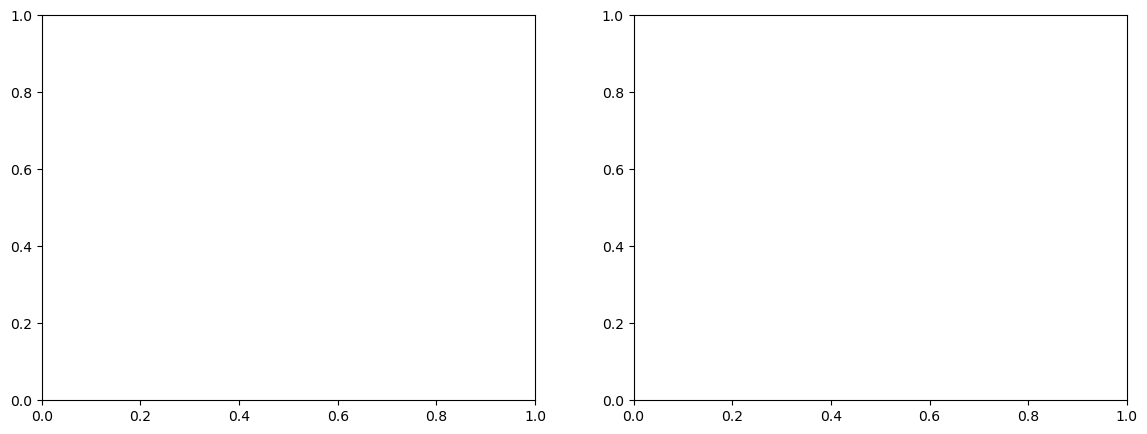

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Cost convergence
axes[0].plot(range(0, 1000, 100), cost_history)
axes[0].set_xlabel("Iteration")
axes[0].set_ylabel("Cost")
axes[0].set_title("Cost Function Convergence")

# Plot 2: Predicted vs Actual
y_pred = X_norm @ w_final + b_final
axes[1].scatter(y_train, y_pred, alpha=0.3)
axes[1].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
             'r--', linewidth=2, label="Perfect prediction")
axes[1].set_xlabel("Actual y")
axes[1].set_ylabel("Predicted y")
axes[1].set_title("Predicted vs Actual")
axes[1].legend()

plt.tight_layout()
plt.show()

## 1.7 Experiment: What Happens Without Feature Scaling?

Try running gradient descent on the **raw (unscaled)** data to see why feature scaling matters.

You may need to use a very small learning rate (e.g., `1e-7`) to avoid diverging.

In [ ]:
# TODO: Experiment — Run gradient descent WITHOUT feature scaling
# Try with learning_rate=0.1 first (it will likely diverge/overflow)
# Then try with a very small learning_rate (e.g., 1e-7)
# Compare the convergence speed with the normalized version above

# Your experiment code here...

---

## Next Steps

Level 1 complete! Continue to:
- **Level 2**: `multiple_regression_sklearn.ipynb` — Reimplement using scikit-learn and compare results
- **Level 3**: `multiple_regression_real_world.ipynb` — Apply to the Diabetes dataset with production-style code